In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('../input/master.csv')

In [158]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [159]:
df.columns = ['country','year','sex','age','suicide_count','population','suicides_per_100k','country_year','HDI_for_year',
             'gdp_for_year','gdp_per_capita','generation']

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicide_count        27820 non-null int64
population           27820 non-null int64
suicides_per_100k    27820 non-null float64
country_year         27820 non-null object
HDI_for_year         8364 non-null float64
gdp_for_year         27820 non-null object
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [161]:
df['country'] = df['country'].astype('category')
df['sex'] = df['sex'].astype('category')
df['age'] = df['age'].astype('category')
df['gdp_for_year'] = df['gdp_for_year'].astype('str')
df['generation'] = df['generation'].astype('category')

In [162]:
df['gdp_for_year']=df.gdp_for_year.str.replace(',','').astype('int')

In [163]:
df.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicide_count            0
population               0
suicides_per_100k        0
country_year             0
HDI_for_year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

In [164]:
df.dropna(inplace=True)

In [165]:
df.drop(labels=['HDI_for_year','country_year'],inplace=True,axis=1)

In [166]:
df.describe()

,year,suicide_count,population,suicides_per_100k,gdp_for_year,gdp_per_capita
count,8364.000000,8364.000000,8.364000e+03,8364.000000,8.364000e+03,8364.000000
mean,2005.348637,206.124342,1.852173e+06,11.991936,5.476639e+11,21074.371593
std,8.803020,681.004457,3.969754e+06,17.361772,1.720106e+12,22579.186968
min,1985.000000,0.000000,8.750000e+02,0.000000,3.962700e+08,313.000000
25%,2000.000000,3.000000,1.216425e+05,1.040000,1.430751e+10,4862.000000
50%,2010.000000,27.000000,4.722505e+05,5.720000,6.175779e+10,12584.000000
75%,2012.000000,127.250000,1.500290e+06,15.442500,3.115395e+11,30271.000000
max,2014.000000,11767.000000,4.350934e+07,187.060000,1.742761e+13,126352.000000


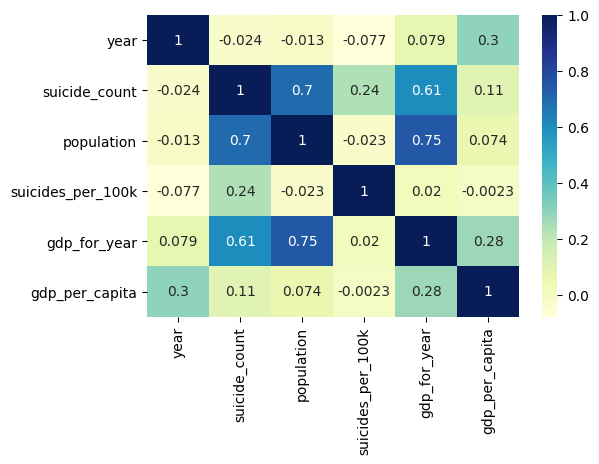

In [167]:
plt.figure(dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

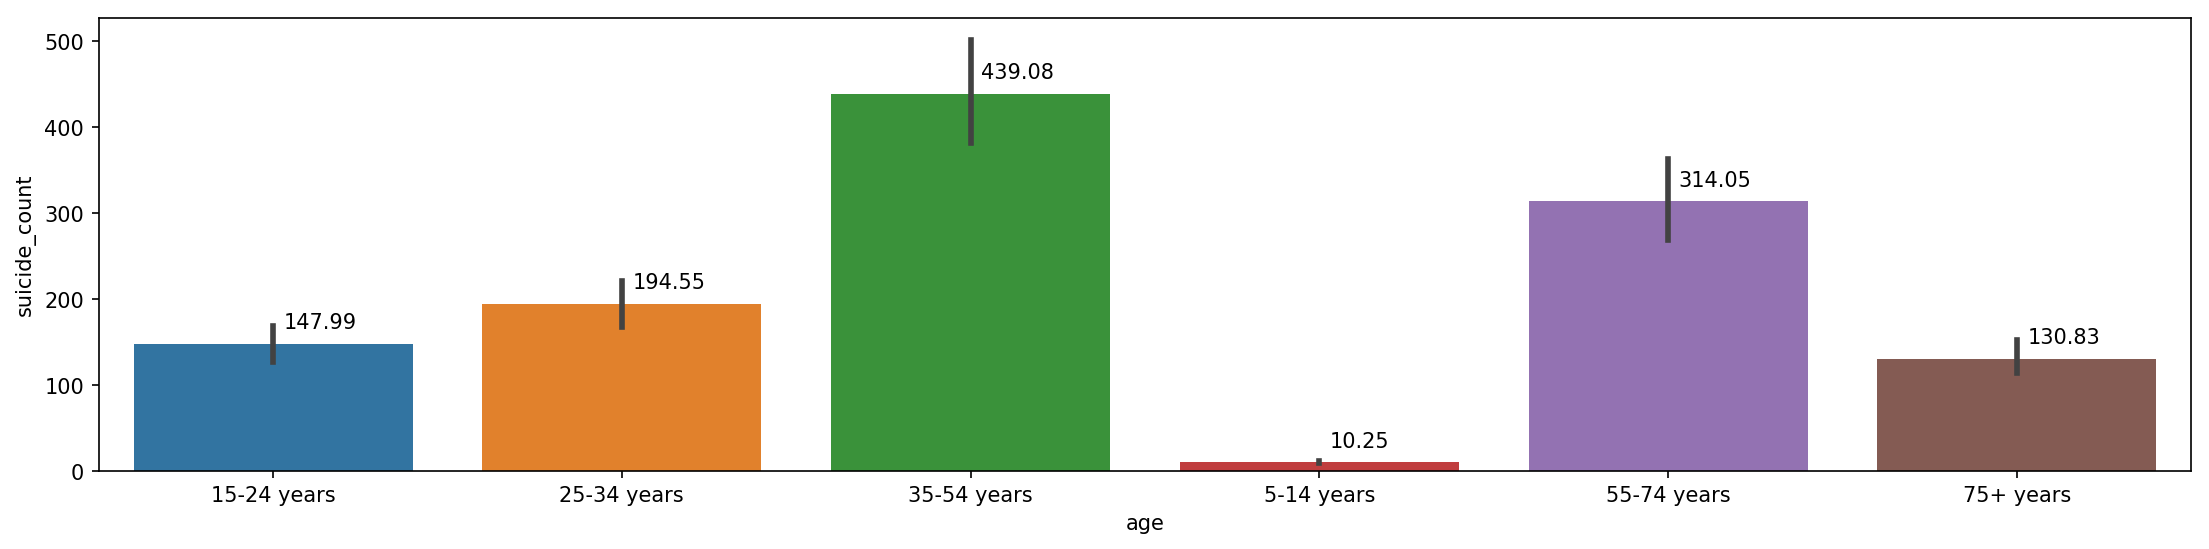

In [168]:
plt.figure(figsize=(18,4),dpi=150)
ax=sns.barplot(df.age,df.suicide_count)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='left', va='center',
                xytext=(5, 10), textcoords='offset points')
plt.show()

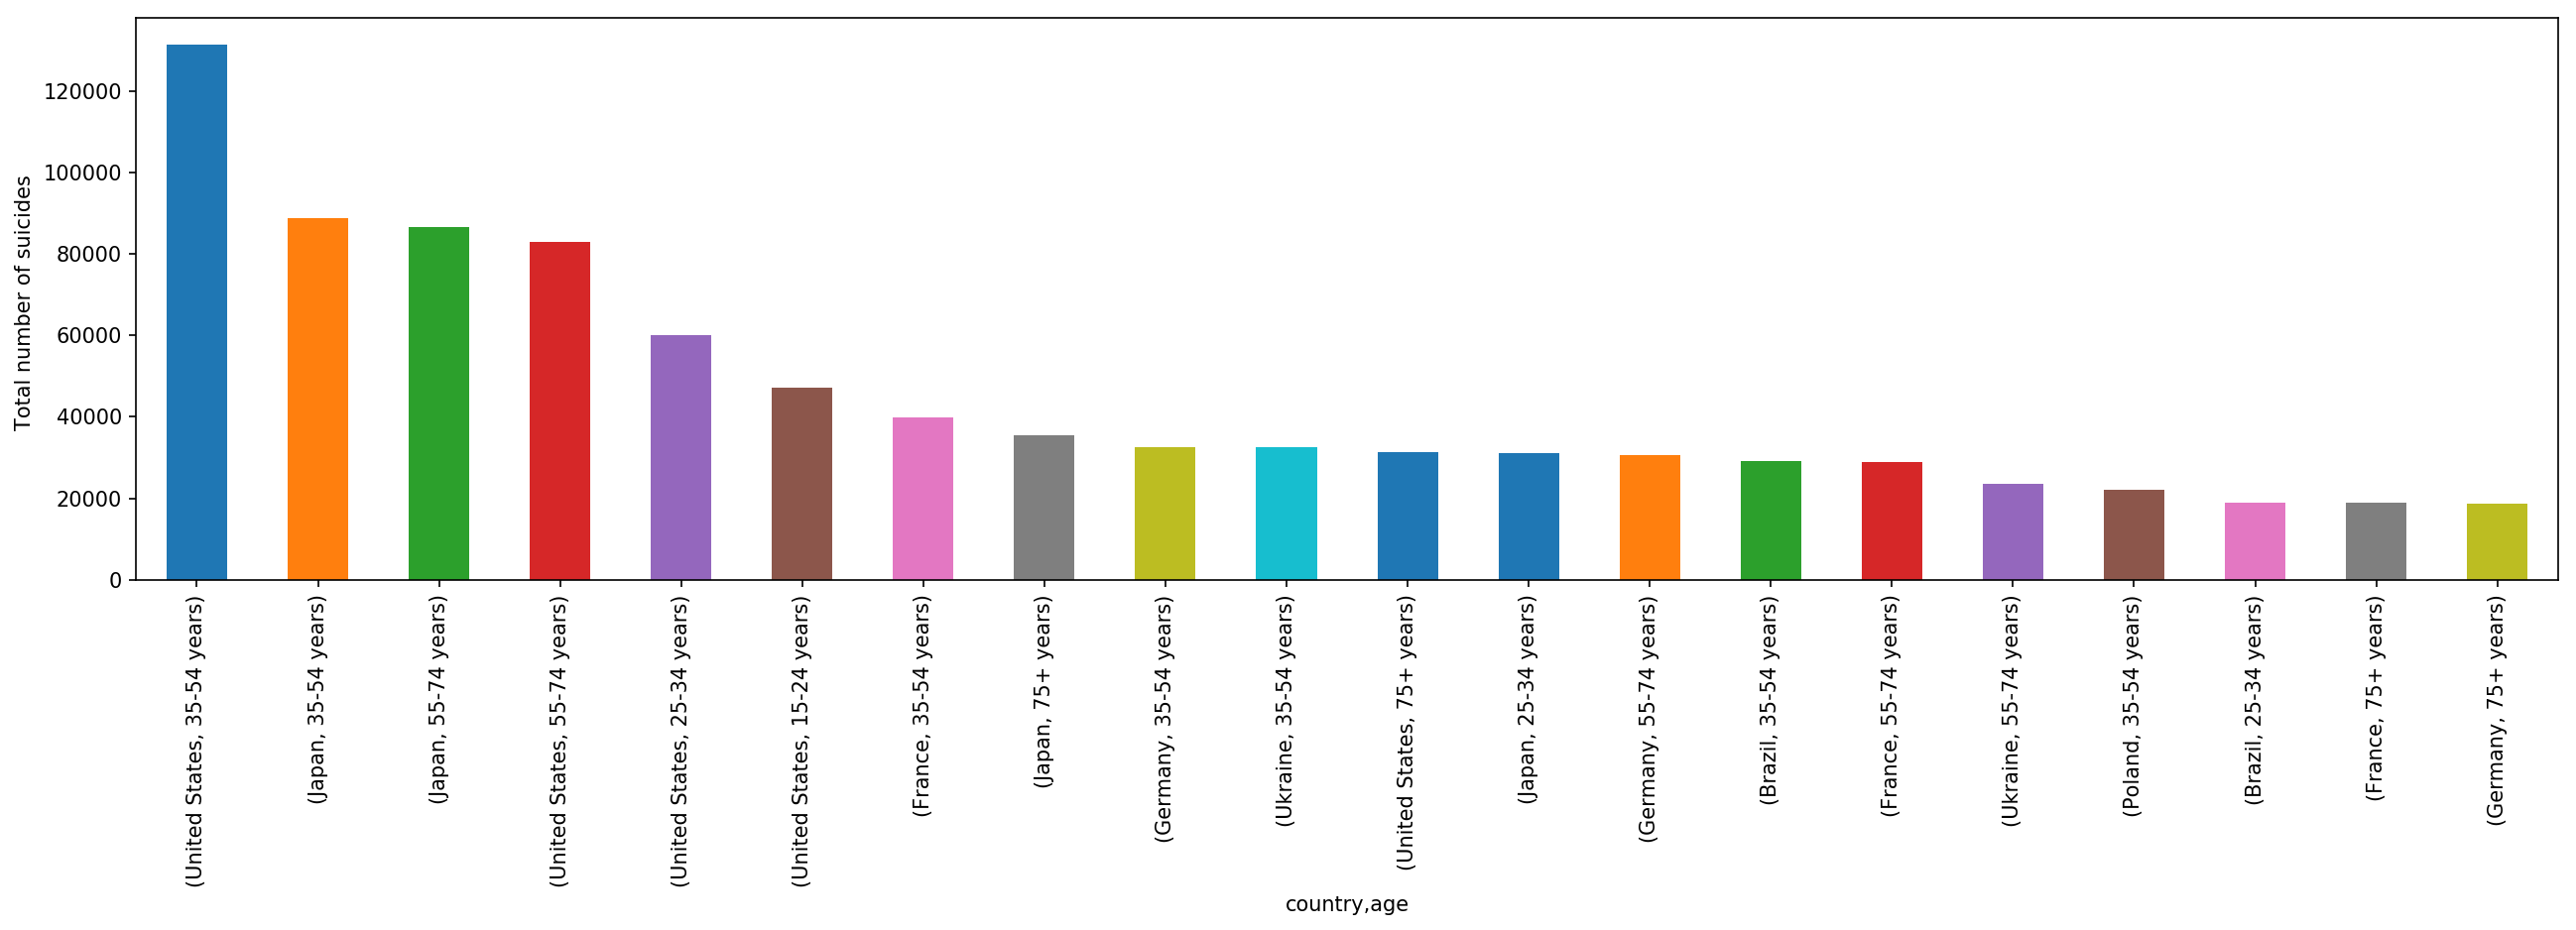

In [169]:
plt.figure(figsize=(21,5),dpi=150)
df.groupby([df.country,df.age]).suicide_count.sum().nlargest(20).plot(kind='bar')
plt.ylabel('Total number of suicides ')
plt.show()

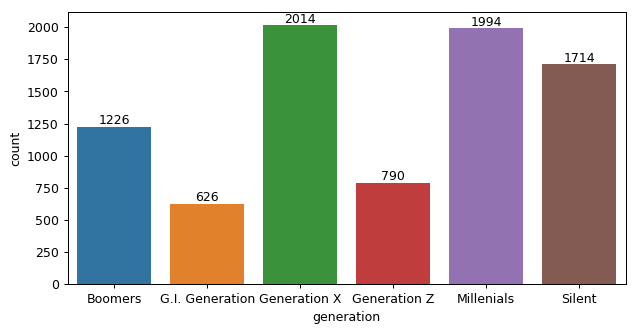

In [183]:
plt.figure(figsize=(8,4),dpi=90)
ax=sns.countplot(df.generation)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='top',
                xytext=(0, 10), textcoords='offset points')
plt.show()

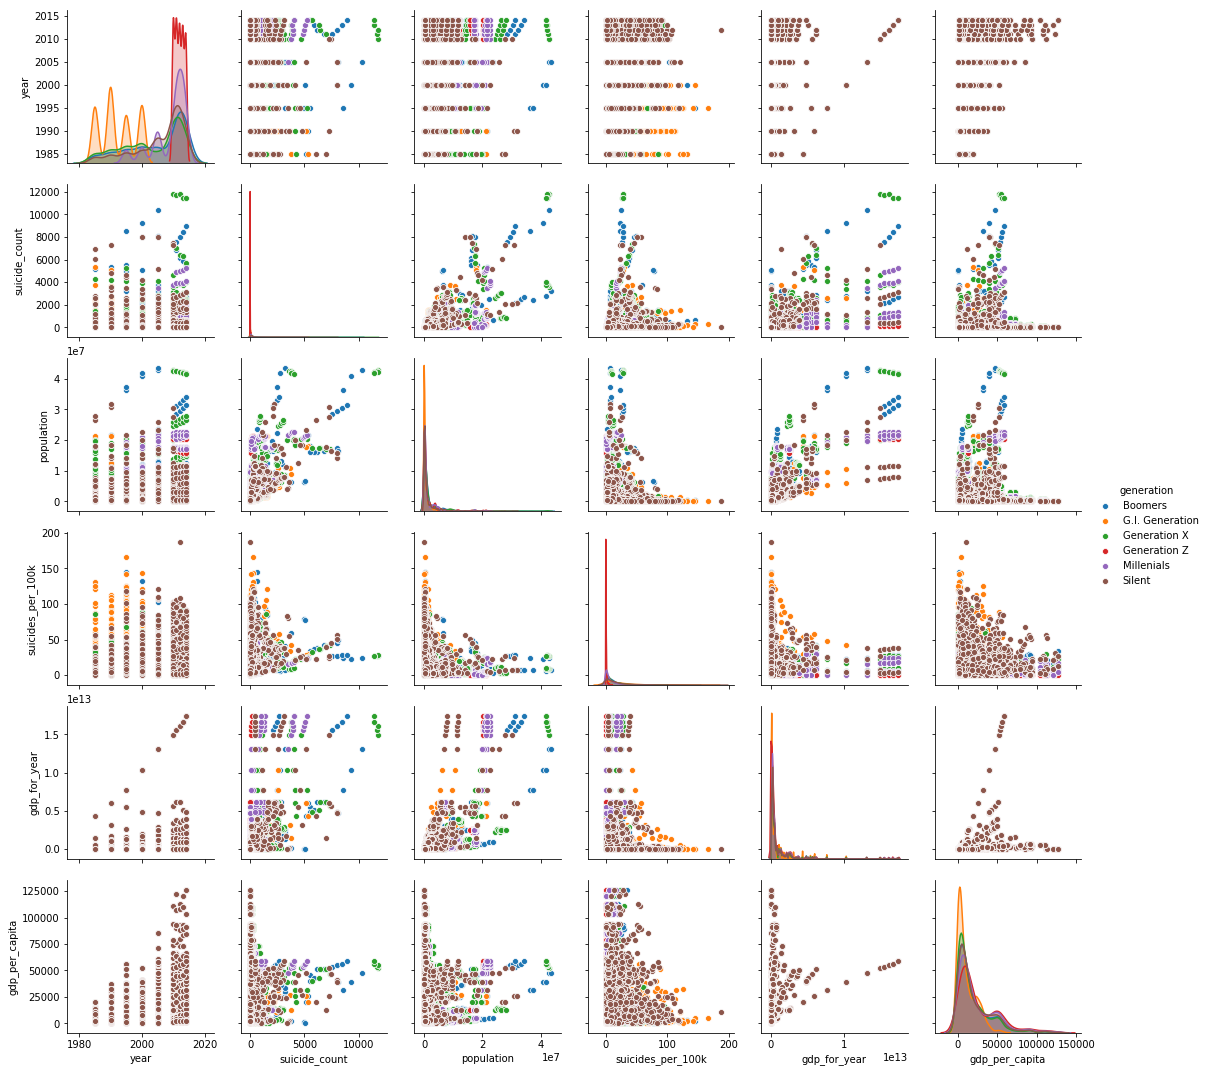

In [171]:
sns.pairplot(data=df,hue='generation')
plt.show()

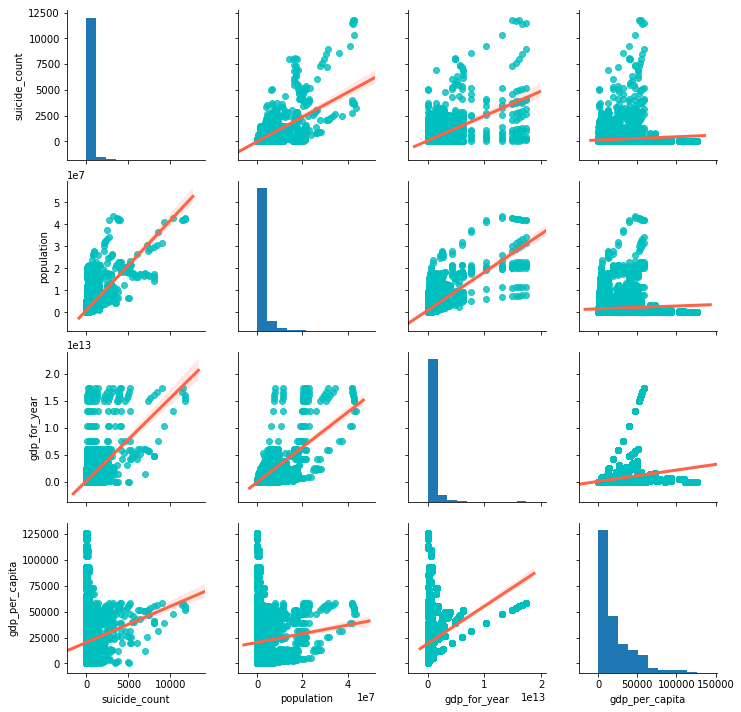

In [172]:
sns.pairplot(data=df.loc[:,['suicide_count','population','gdp_for_year','gdp_per_capita']],kind='reg',
             plot_kws={'color':'c','line_kws':{'color':'tomato','linewidth':3}})
plt.show()

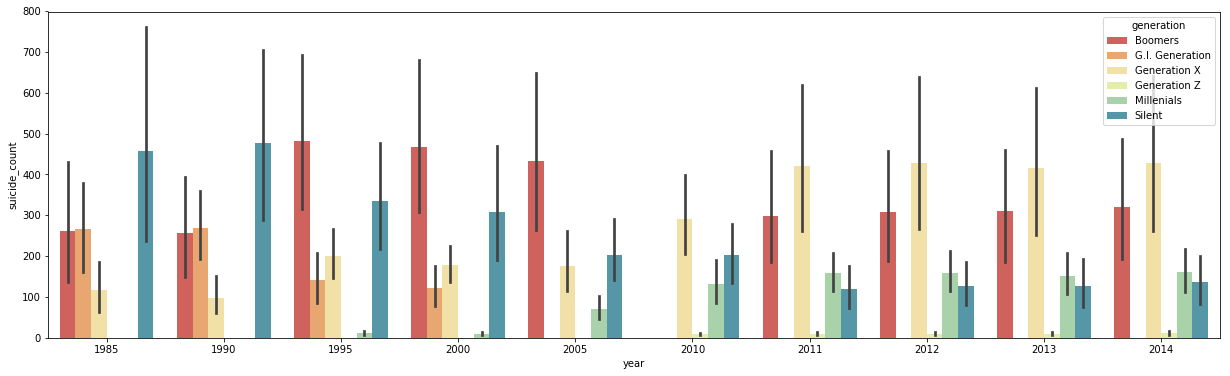

In [173]:
plt.figure(figsize=(21,6))
ax=sns.barplot(y='suicide_count',x='year',hue='generation',data=df,palette='Spectral')
plt.show()

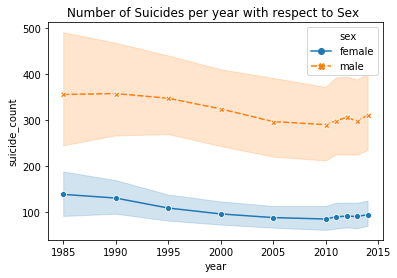

In [174]:
sns.lineplot(x=df.year,y=df.suicide_count,hue=df.sex,data=df,markers=True,style='sex')
plt.title('Number of Suicides per year with respect to Sex ')
plt.show()

<Figure size 432x288 with 0 Axes>

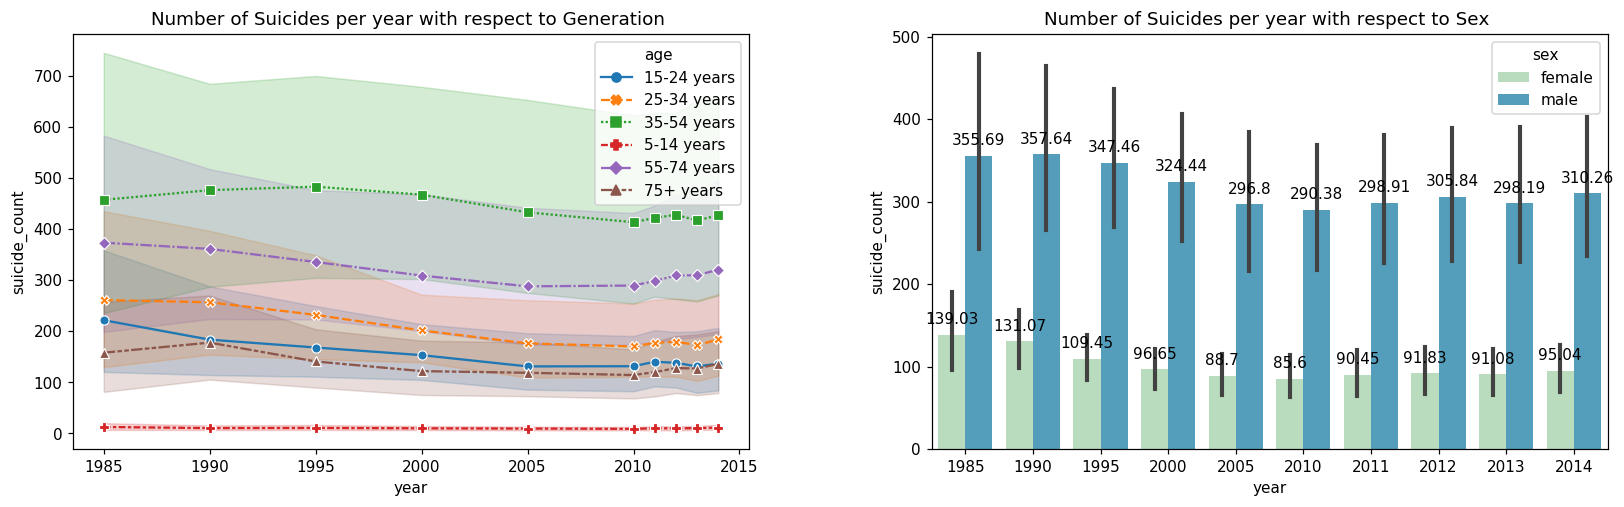

In [175]:
plt.subplots_adjust(right=1, wspace=1, hspace=None)
plt.figure(figsize=(18,5),dpi=110)
plt.subplot(1,2,1)
plt.title('Number of Suicides per year with respect to Generation ')
sns.lineplot(x=df.year,y=df.suicide_count,hue=df.age,markers=True,style=df.age)
plt.legend(loc=1)
plt.subplot(1,2,2)
plt.title('Number of Suicides per year with respect to Sex ')
ax=sns.barplot(y='suicide_count',x='year',data=df,palette="GnBu",hue=df.sex)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')
plt.subplots_adjust(wspace=0.27)
plt.show()

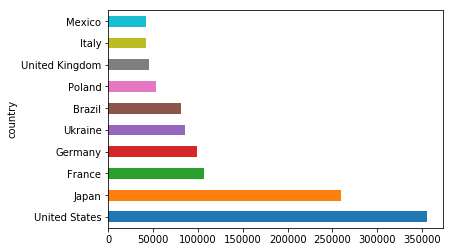

In [176]:
df.groupby(df.country).suicide_count.sum().nlargest(10).plot(kind='barh')

In [177]:
max_suicide_countries=pd.DataFrame(df.groupby(df.country).suicide_count.sum().nlargest(10))

In [178]:
max_suicide_countries.head()

,suicide_count
country,
United States,355963
Japan,259729
France,106296
Germany,98542
Ukraine,85362


In [185]:
min_suicide_countries = pd.DataFrame(df.groupby(df.country).suicide_count.sum()).nsmallest(10,columns='suicide_count')

In [186]:
min_suicide_countries.head()

,suicide_count
country,
Antigua and Barbuda,0
Aruba,0
Cabo Verde,0
Dominica,0
Kiribati,0


In [187]:
# How to display row styles dataframe
#https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [188]:
display_side_by_side(min_suicide_countries,max_suicide_countries)

,suicide_count
country,
Antigua and Barbuda,0
Aruba,0
Cabo Verde,0
Dominica,0
Kiribati,0
Macau,0
Mongolia,0
Puerto Rico,0
Republic of Korea,0
